In [72]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
spring_lupa = pd.read_csv('ts.csv')

In [73]:
# import the ts.csv data and visualize it time series
spring_lupa.head(10)


,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
5,06/01/2009,2.797,NaN
6,07/01/2009,2.797,NaN
7,08/01/2009,2.797,NaN
8,09/01/2009,2.797,NaN
9,10/01/2009,2.797,NaN


In [74]:
def get_spring_lupa():
    spring_lupa = pd.read_csv('ts.csv')
    spring_lupa['Date'] = pd.to_datetime(spring_lupa['Date'])
    spring_lupa['Date'] = spring_lupa['Date'].dt.strftime('%Y-%m-%d')
    spring_lupa['Year'] = pd.DatetimeIndex(spring_lupa['Date']).year
    spring_lupa['Month'] = pd.DatetimeIndex(spring_lupa['Date']).month
    spring_lupa['Day'] = pd.DatetimeIndex(spring_lupa['Date']).day

    return spring_lupa
spring_lupa = get_spring_lupa()
spring_lupa.head(10)



C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_14448\1857988293.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  spring_lupa['Date'] = pd.to_datetime(spring_lupa['Date'])


,Date,Rainfall_Terni,Flow_Rate_Lupa,Year,Month,Day
0,2009-01-01,2.797,NaN,2009,1,1
1,2009-02-01,2.797,NaN,2009,2,1
2,2009-03-01,2.797,NaN,2009,3,1
3,2009-04-01,2.797,NaN,2009,4,1
4,2009-05-01,2.797,NaN,2009,5,1
5,2009-06-01,2.797,NaN,2009,6,1
6,2009-07-01,2.797,NaN,2009,7,1
7,2009-08-01,2.797,NaN,2009,8,1
8,2009-09-01,2.797,NaN,2009,9,1
9,2009-10-01,2.797,NaN,2009,10,1


In [80]:
spring_lupa.dropna(inplace = True)
spring_lupa.reset_index(inplace = True)
spring_lupa.head(10)


,index,Date,Rainfall_Terni,Flow_Rate_Lupa,Year,Month,Day
0,0,2009-02-19,2.763,-166.02,2009,2,19
1,1,2009-02-20,2.763,-166.97,2009,2,20
2,2,2009-02-21,2.763,-167.72,2009,2,21
3,3,2009-02-22,2.763,-168.65,2009,2,22
4,4,2009-02-23,2.763,-169.42,2009,2,23
5,5,2009-02-24,2.763,-170.21,2009,2,24
6,6,2009-02-25,2.763,-171.10,2009,2,25
7,7,2009-02-26,2.763,-171.69,2009,2,26
8,8,2009-02-27,2.763,-172.07,2009,2,27
9,9,2009-02-28,2.763,-172.33,2009,2,28


<Figure size 2000x1000 with 0 Axes>

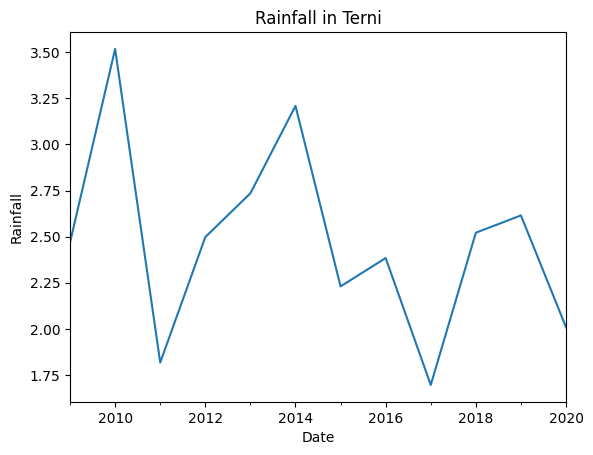

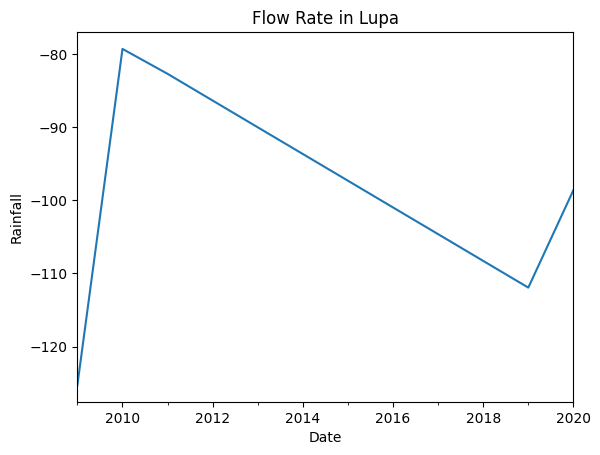

In [107]:
temp = spring_lupa.dropna().groupby(pd.Grouper(key = 'Date', freq = 'YS')).mean().reset_index() #grouping by years
temp['Season'] = pd.DatetimeIndex(temp['Date']).month
fig = plt.figure(figsize = (20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
temp.plot(kind = 'line', x = 'Date', y = 'Rainfall_Terni', legend = False)
plt.title('Rainfall in Terni')
plt.xlabel('Date')
plt.ylabel('Rainfall')
temp.plot(kind = 'line', x = 'Date', y = 'Flow_Rate_Lupa', legend = False)
plt.title('Flow Rate in Lupa')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

Coefficients: [1.19668031 0.51627293]
predicted=1.196680, expected=0.000000
predicted=1.814494, expected=0.000000
predicted=2.133454, expected=0.000000
predicted=2.298125, expected=0.000000
predicted=2.383140, expected=0.000000
predicted=2.427031, expected=0.000000
predicted=2.449691, expected=0.000000
Test RMSE: 2.142


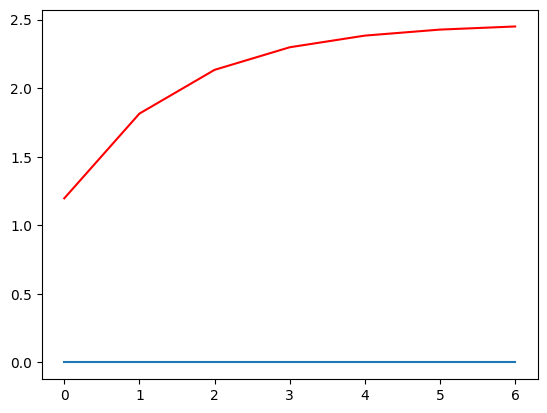

In [115]:
# create and evaluate a static model autoregressive model for the time series
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
# First Order Differencing

X = spring_lupa['Rainfall_Terni'].values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


